# Imports

In [ ]:
# !unzip -u "/content/drivedrive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/media.zip" -d "/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media"

In [ ]:
%%capture
!pip install contractions

In [ ]:
import ast
import codecs
import datetime
import math
import os
import re
import smtplib
import string
import time
from ast import literal_eval
from collections import Counter

import contractions
import gensim
import lxml
import nltk
import numpy as np
import pandas as pd
import requests
import scipy
import seaborn as sns
import spacy
from bs4 import BeautifulSoup
from lxml.html.clean import Cleaner
from matplotlib import font_manager
from matplotlib import pyplot as plt
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from numpy.linalg import norm
from wordcloud import WordCloud
import multiprocessing
WORKERS = multiprocessing.cpu_count()
from tqdm.auto import tqdm
tqdm.pandas()

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download(['punkt', 'stopwords', 'wordnet', 'words'], quiet = True)

True

In [ ]:
stopwords = stopwords.words('english')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#Read data

In [ ]:
pd.set_option('display.max_colwidth',400)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/multi label classi/uncleaned_data.csv')

In [ ]:
df

body  \
0      \n \n \n \n \n \n No cookies, no javascript, no trace. We protect your privacy! \n \n \n \n \n \n  drugsshopper@dnmx.org \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n Home \n \n Question/Answer \n \n Cart \n \n \n \n Contact \n Escrow \n \n \n \n \n \n \n \n \n \n \n \n \n Category \n \n \n \n \n \r\n                                                     ...   
1      \n \n \n \n \n \n No cookies, no javascript, no trace. We protect your privacy! \n \n \n \n \n \n  drugsshopper@dnmx.org \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n Home \n \n Question/Answer \n \n Cart \n \n \n \n Contact \n Escrow \n \n \n \n \n \n \n \n \n \n \n \n \n Category \n \n \n \n \n \r\n                                                     ...   
2      \n \n \n \n \n \n \n \n \n \n \n drugshop@dnmx.org \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n  Cart(0) \n \n \n \n \n \n \n \n \n \n \n \n \n Home \n \n Catalog \n \n \n Question/Answer \n \n Cart \n \n \n \n Contact \n Escrow \n \n \n \n \n \n \n \n \n \n \n \n \n Category \n \n \n \n \n \r\n                                                                            Cannabis       ...   
3      \n \n \n \n \n \n \n \n \n \n \n  drugsshopper@dnmx.org \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n  Cart(0) \n \n \n \n \n \n \n \n \n \n \n \n \n Home \n \n Catalog \n \n \n Question/Answer \n \n Cart \n \n \n \n Contact \n \n \n \n \n \n \n \n \n \n \n \n \n Category \n \n \n \n \n \r\n                                                                            Cannabis            ...   
4      \n \n \n \n \n \n No cookies, no javascript, no trace. We protect your privacy! \n \n \n \n \n \n  drugsshopper@dnmx.org \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n Home \n \n Question/Answer \n \n Cart \n \n \n \n Contact \n Escrow \n \n \n \n \n \n \n \n \n \n \n \n \n Category \n \n \n \n \n \r\n                                                     ...   
...                                                                                                                                                                                                                                                                                                                                                                                                                ...   
20245  \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n January 5, 1998 \n On the Internet, Forever-Mutating Debates\n             \n \n Related Articles \n Outlook '98 , an annual survey of the economy, markets and industry\n             \n News Highlights of 1997  From CyberTimes\n                 Forum \n \n \n  Predictions for the Year Ahead \n \n By AMY HARMON \n   skin...   
20246  \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n January 5, 1998 \n 1997 Technology Highlights \n \n \n Related Articles \n Outlook '98 , an annual survey of the economy, markets and industry\n                 \n \n \n   HOMESPUN SUITOR WINS FIGHT FOR MCI \n \n   \n \n   t seemed like the perfect marriage for a decade of globalization: MCI and British Telecommunicatio...   
20247  \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n Credit: The New York Times \n \n \n \n \n Go to Article \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n Home  |\n                             Site Index  | \n Site Search  |  \n Forums  |\n                             Archives  |\n                             Marketp...   
20248  \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n                            Just another volatile day in a volatile year on Wall Street: Cleaning up at the New York Stock Exchange on Oct. 23, when the Dow Jones industrial average fell more than 186 points.\

# Data preparation

In [ ]:
stop = set(stopwords + list(string.punctuation))

In [ ]:
words = set(nltk.corpus.words.words())

In [ ]:
words.add('drugs')

In [ ]:
sum(df['description'].isna())

2539

In [ ]:
sum(df['title'].isna())

0

In [ ]:
sum(df['body'].isna())

0

In [ ]:
df['body']

0        \n \n \n \n \n \n No cookies, no javascript, no trace. We protect your privacy! \n \n \n \n \n \n  drugsshopper@dnmx.org \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n Home \n \n Question/Answer \n \n Cart \n \n \n \n Contact \n Escrow \n \n \n \n \n \n \n \n \n \n \n \n \n Category \n \n \n \n \n \r\n                                                                            Cannabis                                                                         \n \n \n \n \n \n \r\n                                                                            Seeds Cannabis                                                                         \n \n \n \n \n \n \r\n                                                                            Cocaine                                                                         \n \n \n \n \n \n \r\n                                                                            Ecstasy                       

In [ ]:
sent = "this is a sentence café a ofc nope Comment ça va de \x88í\x95\x98ê¸°ì\x9d´ë\x8f\x99ì\x9d"
sent = sent.encode("ascii", "ignore")
sent = sent.decode()
word_list = set(word_tokenize(sent))
temp = ''
for word in word_list:
  word = word.lower()
  if (len(word)>=3) and (word in words) and (word not in stop):
    temp = temp + ' '+ word
temp = temp.strip()
temp

In [ ]:
def isNotNaN(string):
    return not(string != string) 

In [ ]:
body_list = []
desc_list = []
title_list = []
for i in tqdm(range(0,len(df))):
  # body
  body = df.iloc[i,0]
  body = body.encode("ascii", "ignore")
  body = body.decode()
  body_word_list = word_tokenize(body)

  temp = ''
  for word in body_word_list:
    word = word.lower()
    if (len(word)>=3)  and (word in words) and (word not in stop):
      temp = temp + ' '+ word
  temp = temp.strip()
  body_list.append(temp)

  # desc
  desc = df.iloc[i,1]

  temp = ''
  if isNotNaN(desc):
    desc = desc.encode("ascii", "ignore")
    desc = desc.decode()
    desc_word_list = word_tokenize(desc)
    for word in desc_word_list:
      word = word.lower()
      if (len(word)>=3)  and (word in words) and (word not in stop):
        temp = temp + ' '+ word
  temp = temp.strip()
  desc_list.append(temp)

  #  title
  title = df.iloc[i,2]

  title = title.encode("ascii", "ignore")
  title = title.decode()
  title_word_list = word_tokenize(title)
  temp = ''
  for word in title_word_list:
    word = word.lower()
    if (len(word)>=3)  and (word in words) and (word not in stop):
      temp = temp + ' '+ word
  temp = temp.strip()
  title_list.append(temp)

df['preprocessed_body'] = body_list
df['preprocessed_description'] = desc_list
df['preprocessed_title'] = title_list

  0%|          | 0/20250 [00:00<?, ?it/s]

In [ ]:
df[['preprocessed_title','preprocessed_description','preprocessed_body']]

preprocessed_title            preprocessed_description  \
0                  cocaine drugs     drugs store buy ecstasy cocaine   
1                                    drugs store buy ecstasy cocaine   
2      buy drugs ecstasy cocaine     drugs store buy ecstasy cocaine   
3                drugs shop hash  drugs shop buy best marijuana hemp   
4                          drugs     drugs store buy ecstasy cocaine   
...                          ...                                 ...   
20245                                                                  
20246                 technology                                       
20247           stock volatility                                       
20248                wall street                                       
20249                 oil output                                       

                                       preprocessed_body  
0      trace protect privacy home cart contact escrow...  
1      trace protect privacy home cart contact escrow...  
2      drugshop cart home cart contact escrow categor...  
3      cart home cart contact category add cart dream...  
4      trace protect privacy home cart contact escrow...  
...                                                  ...  
20245  related outlook annual survey economy industry...  
20246  technology related outlook annual survey econo...  
20247  credit new york times article home site index ...  
20248  another volatile day volatile year wall street...  
20249  credit new york times article home site index ...  

[20250 rows x 3 columns]

In [ ]:
df['page'] = df['preprocessed_title'] +' '+ df['preprocessed_description'] +' '+ df['preprocessed_body']

# TF-IDF 

In [ ]:
text_req=df["page"].to_list()

In [ ]:
text_req

['cocaine drugs drugs store buy ecstasy cocaine trace protect privacy home cart contact escrow category cocaine ecstasy pure love mix cocaine ecstasy blue android gram crystal crystal drugs shop home',
 ' drugs store buy ecstasy cocaine trace protect privacy home cart contact escrow category cocaine ecstasy pure love mix cocaine ecstasy blue android gram crystal crystal drugs shop home',
 'buy drugs ecstasy cocaine drugs store buy ecstasy cocaine drugshop cart home cart contact escrow category cocaine ecstasy pure love add cart mix add cart cocaine add cart ecstasy blue android add cart add cart gram crystal crystal add cart drugs shop home',
 'drugs shop hash drugs shop buy best marijuana hemp cart home cart contact category add cart dream add cart add cart pure love add cart mix add cart add cart drugs shop home',
 'drugs drugs store buy ecstasy cocaine trace protect privacy home cart contact escrow category cocaine ecstasy pure love mix cocaine ecstasy blue android gram crystal crys

In [ ]:
# def tf_idf(corpus,document):
#     total_docs=len(corpus)
#     # print(total_docs)
#     doc_set=corpus[document].split(" ")
#     # print(total_docs)
#     # print(doc)
#     words = corpus[document].split()
#     wfreq=[words.count(w) for w in words]
#     tf_idf=dict(zip(words,wfreq))
#     # print(tf_idf)
#     for term in doc_set:
#       if term:
#           print(tf_idf[term])
#           tf_idf[term]=1+math.log2(tf_idf[term])
#           # print('indi word:',term)
#       # print(tf_idf)
#           idf_docs = []
#           # idf_docs=[w for w in corpus if i in w]
#           for doc in corpus:
#             # print('doc',doc)
#             if term in doc:
#               idf_docs.append(doc)
#           tf_idf[term]=math.log2(total_docs/len(idf_docs))*tf_idf[term]
#     return tf_idf

In [ ]:
# weights = []

In [ ]:
vectorizer = TfidfVectorizer(
    decode_error='ignore',
    sublinear_tf=True
)
X = vectorizer.fit_transform(text_req)

In [ ]:
features = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df2 = pd.DataFrame(top_feats)
    df2.columns = ['feature', 'tfidf']
    return df2

In [ ]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
  row = np.squeeze(Xtr[row_id].toarray())
  return top_tfidf_feats(row, features, top_n)

In [ ]:
def get_weights(row):
  t = top_feats_in_doc(X,features,row.name)
  return pd.Series(t.tfidf.values,index=t.feature).to_dict()

In [ ]:
df['weights'] = df.progress_apply(get_weights,axis = 1)

  0%|          | 0/20250 [00:00<?, ?it/s]

In [ ]:
# for i in range(0,df.shape[0]):
#   # print(i)
#   dict_tfidf= tf_idf(text_req,i)
#   # print(dict_tfidf)
#   weights.append(dict_tfidf)

In [ ]:
# len(weights)

In [ ]:
# df.to_csv('temp4.csv')

In [ ]:
# path = '/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/preprocessed-data.csv'

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   df.to_csv(f)

In [ ]:
# path = '/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/preprocessed-data2.csv'

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   df.to_csv(f)

In [ ]:
# df = pd.read_csv('temp4.csv')

In [ ]:
# df.drop('Unnamed: 0',axis = 1,inplace = True)

# Extracting potential labels

In [ ]:
extracted_labels = []

In [ ]:
def extract_labels(row):
  # print(row)
  if  isinstance(row, str):
    row = ast.literal_eval(row)   

  temp = sorted(row.items(), key=lambda x: x[1], reverse=True)
  # print(temp)
  labels = []
  if len(temp) <= 6:
    no_iter = 6
  if len(temp) >= 20:
    no_iter = 0.6 * len(temp)
  else:
    no_iter = 0.7 * len(temp)
  i = 1
  for item in temp:
    labels.append(item[0])
    if i >= no_iter:
      break
    i = i + 1
  return labels


In [ ]:
def literal_return_dict(val):
    try:
        return ast.literal_eval(val)
    except:
        return {}

if running from top, use this

In [189]:
df['extracted_labels'] = df['weights'].progress_apply(lambda i: list(i.keys()))

  0%|          | 0/20250 [00:00<?, ?it/s]

if df is imported from the cell in the next section

In [ ]:
# df['extracted_labels'] = df['weights'].progress_apply(lambda i: list(literal_return_dict(i).keys()))

  0%|          | 0/20250 [00:00<?, ?it/s]

In [ ]:
df['extracted_labels'] = df['weights'].progress_apply(extract_labels)

  0%|          | 0/20250 [00:00<?, ?it/s]

In [ ]:
# len(extracted_labels)

In [ ]:
# df['extracted_labels'] = extracted_labels

In [ ]:
path = '/content/drive/MyDrive/Projects/multi label classi/cleaned_data.csv'

df.to_csv(path, index=False)

# Generalizing keywords into labels

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/multi label classi/cleaned_data.csv')

In [ ]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [ ]:
def tokenize(text):
  # text = literal_eval(text)
  # text = ' '.join(text)
  text = text.lower()
  text = contractions.fix(text)
  tokens = []
  for token in word_tokenize(text):
    if token not in stopwords and token.isalpha():
      tokens.append(token)

  return tokens

# df = pd.read_csv('/content/drive/MyDrive/preprocessed-data2.csv', usecols=['Text', 'extracted_labels'])
# df['labels'] = df.extracted_labels.apply(literal_eval)
# df.rename({"Text": 'page'}, axis=1, inplace=True)
# df.drop(['extracted_labels'], axis=1, inplace=True)

In [ ]:

# w2v= gensim.models.Word2Vec(size=300, window=5, min_count=1, workers=WORKERS)

# # inp = df.apply(lambda i: tokenize(i['page'] + ' ' + " ".join(i['labels'])), axis=1)
# inp = df['page'].apply(tokenize)

# w2v.build_vocab(inp)
# total_examples = w2v.corpus_count
# w2v.intersect_word2vec_format('/content/drive/MyDrive/Stance Detection from Text/Saved models/GoogleNews.bin', binary=True, lockf=1.0)

# w2v.train(inp, total_examples=total_examples, epochs=5)

# # w2v = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/stance_detection/GoogleNews-vectors-negative300.bin', binary=True)
# EMBEDDING_DIM = 300

In [ ]:
import gensim.downloader as api

In [ ]:
# print(api.load("fasttext-wiki-news-subwords-300", return_path=True))

[==================================================] 100.0% 958.5/958.4MB downloaded
/root/gensim-data/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz


In [ ]:
# !cp /root/gensim-data/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz '/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/'

In [ ]:
# # load
# !cp '/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/fasttext-wiki-news-subwords-300.gz' /root/gensim-data/fasttext-wiki-news-subwords-300/

In [ ]:
ft =  api.load('fasttext-wiki-news-subwords-300')

In [ ]:
np.dot(ft['tech'],ft['technology'])/(norm(ft['tech'])*norm(ft['technology']))

0.699695

In [ ]:
# w2v.wv.save('/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/word2vec.wordvectors')

In [ ]:
# w2v = gensim.models.KeyedVectors.load("word2vec.wordvectors", mmap='r')

In [ ]:
df = df[df.apply(lambda row: len(row['page']) > 0 , axis=1)]

In [ ]:
# w2v.most_similar('onion')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('potato', 0.5756994485855103),
 ('everything', 0.5719113349914551),
 ('tomato', 0.5680567026138306),
 ('asparagus', 0.5296876430511475),
 ('system', 0.5273357033729553),
 ('alternative', 0.5074076056480408),
 ('package', 0.4958958029747009),
 ('except', 0.4948974847793579),
 ('vegetable', 0.48813027143478394),
 ('mango', 0.48652034997940063)]

In [ ]:
# text = ' '
# for i in df['extracted_labels']:
#   for j in i:
#     text = text +' ' + j 

In [ ]:
# wordcloud_spam = WordCloud(background_color="black", max_words=300).generate(text)

# # Lines 2 - 5
# plt.figure(figsize = (20,20))
# plt.imshow(wordcloud_spam, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [ ]:
output_tokens = [
    'agriculture',
    'banking',
    'blockchain',
    'business', 
    'crime',
    'cryptocurrency',
    'economy', 
    'education', 
    'entertainment', 
    'environment', 
    'fashion', 
    'finance',
    'food',
    'governance', 
    'health', 
    'network',
    'politics', 
    'security',
    'software',
    'sport',
    'technology',
    'web', 
]

# cyberseclist = ['hacker','hacking','firewall','antivirus','crptography','encryption','decryption','skimmer']
ecomlist = ['ship', 'shipping', 'shipped', 'shipment', 'sell', 'buy']

def generalizeTokens(tokens):
#   print(output_tokens)
  output = []
#   tokens = literal_eval(tokens)
#   print('tokens',tokens)
  for token in tokens:
    # print('token',token)
    solution = 0
    solution_token = None
    if token.lower() in {'onion', 'tor'}:
      output.append('network')
    #   continue
    if token.lower() in ecomlist:
      output.append('commerce')
    #   continue
    
    for matchToken in output_tokens:
    #   print('matchtoken',matchToken)
      try:
        # t = scipy.spatial.distance.cosine(w2v[matchToken], w2v[token])
        # t = w2v.wv.similarity(w2v[matchToken], w2v[token])
        # t = np.dot(w2v[matchToken],w2v[token])/(norm(w2v[matchToken])*norm(w2v[token]))
        t = np.dot(ft[matchToken],ft[token])/(norm(ft[matchToken])*norm(ft[token]))
        # print(t) 
        # if t<0.2:
        #   continue
        # print(token, ' ', matchToken, ' ', t)
        if solution <= t:
          solution = t
          solution_token = matchToken
      except:
        continue
    if solution_token is not None and  solution>0.60:
    #   print('solution token',solution_token)
      output.append(solution_token)

  return list(set(output))

In [ ]:
def literal_return(val):
    try:
        return ast.literal_eval(val)
    except:
        return []

In [ ]:
df_copy = df.copy()

In [191]:
df['gl'] = df['extracted_labels'].progress_apply(generalizeTokens)

  0%|          | 0/20250 [00:00<?, ?it/s]

In [228]:
# df.to_csv('/content/drive/MyDrive/Projects/multi label classi/df-25labels.csv', index=False)
# df = pd.read_csv('/content/drive/MyDrive/Projects/multi label classi/df.csv')
# df = pd.read_csv('/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/gl-entiredataset3.csv')

In [229]:
df['gl'] = df['gl'].apply(literal_return)

In [279]:
df['extracted_labels'] = df['extracted_labels'].apply(literal_return)

In [ ]:
df.iloc[20229]['body']

'\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n Credit: The New York Times \n \n \n \n \n Go to Article \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n Home  |\n                             Site Index  | \n Site Search  |  \n Forums  |\n                             Archives  |\n                             Marketplace \n \n \n \n \n Quick News  |  \n Page One Plus  | \n International  |\n                             National/N.Y.  |\n                             Business  |\n                             Technology  |\n                             Science  |\n                             Sports  |\n                             Weather  |\n                             Editorial  |\n                             Op-Ed  |\n                             Arts  |\n                             Automobiles  |\n                             Books  |\n                             Diversions  |\n                        

In [185]:
a = 'culture'
b = 'village'
np.dot(ft[a],ft[b])/(norm(ft[a])*norm(ft[b]))

0.47356847

In [193]:
df[['preprocessed_title', 'extracted_labels', 'gl']].head(1000)

preprocessed_title  \
0                                        cocaine drugs   
1                                                        
2                            buy drugs ecstasy cocaine   
3                                      drugs shop hash   
4                                                drugs   
..                                                 ...   
995  know last night theyre keeping secret new york...   
996  opinion built unbelievable legal facial recogn...   
997             opinion phone democracy new york times   
998                      opinion report new york times   
999  opinion read privacy incomprehensible disaster...   

                                      extracted_labels  \
0    [cocaine, ecstasy, crystal, drugs, gram, escro...   
1    [ecstasy, cocaine, crystal, drugs, gram, escro...   
2    [cart, ecstasy, cocaine, add, crystal, drugs, ...   
3    [cart, add, shop, drugs, hemp, hash, marijuana...   
4    [ecstasy, cocaine, crystal, drugs, gram, escro...   
..                                                 ...   
995  [location, anonymous, imagery, data, hedge, pe...   
996  [facial, recognition, optometry, unbelievable,...   
997  [chevy, location, hong, imagery, surveillance,...   
998  [location, resale, profiting, data, advertisin...   
999  [periscope, personalize, delete, yahoo, collec...   

                                 gl  
0    [business, commerce, security]  
1    [business, commerce, security]  
2              [business, commerce]  
3              [business, commerce]  
4    [business, commerce, security]  
..                              ...  
995             [business, finance]  
996          [technology, politics]  
997                    [technology]  
998         [business, environment]  
999               [technology, web]  

[1000 rows x 3 columns]

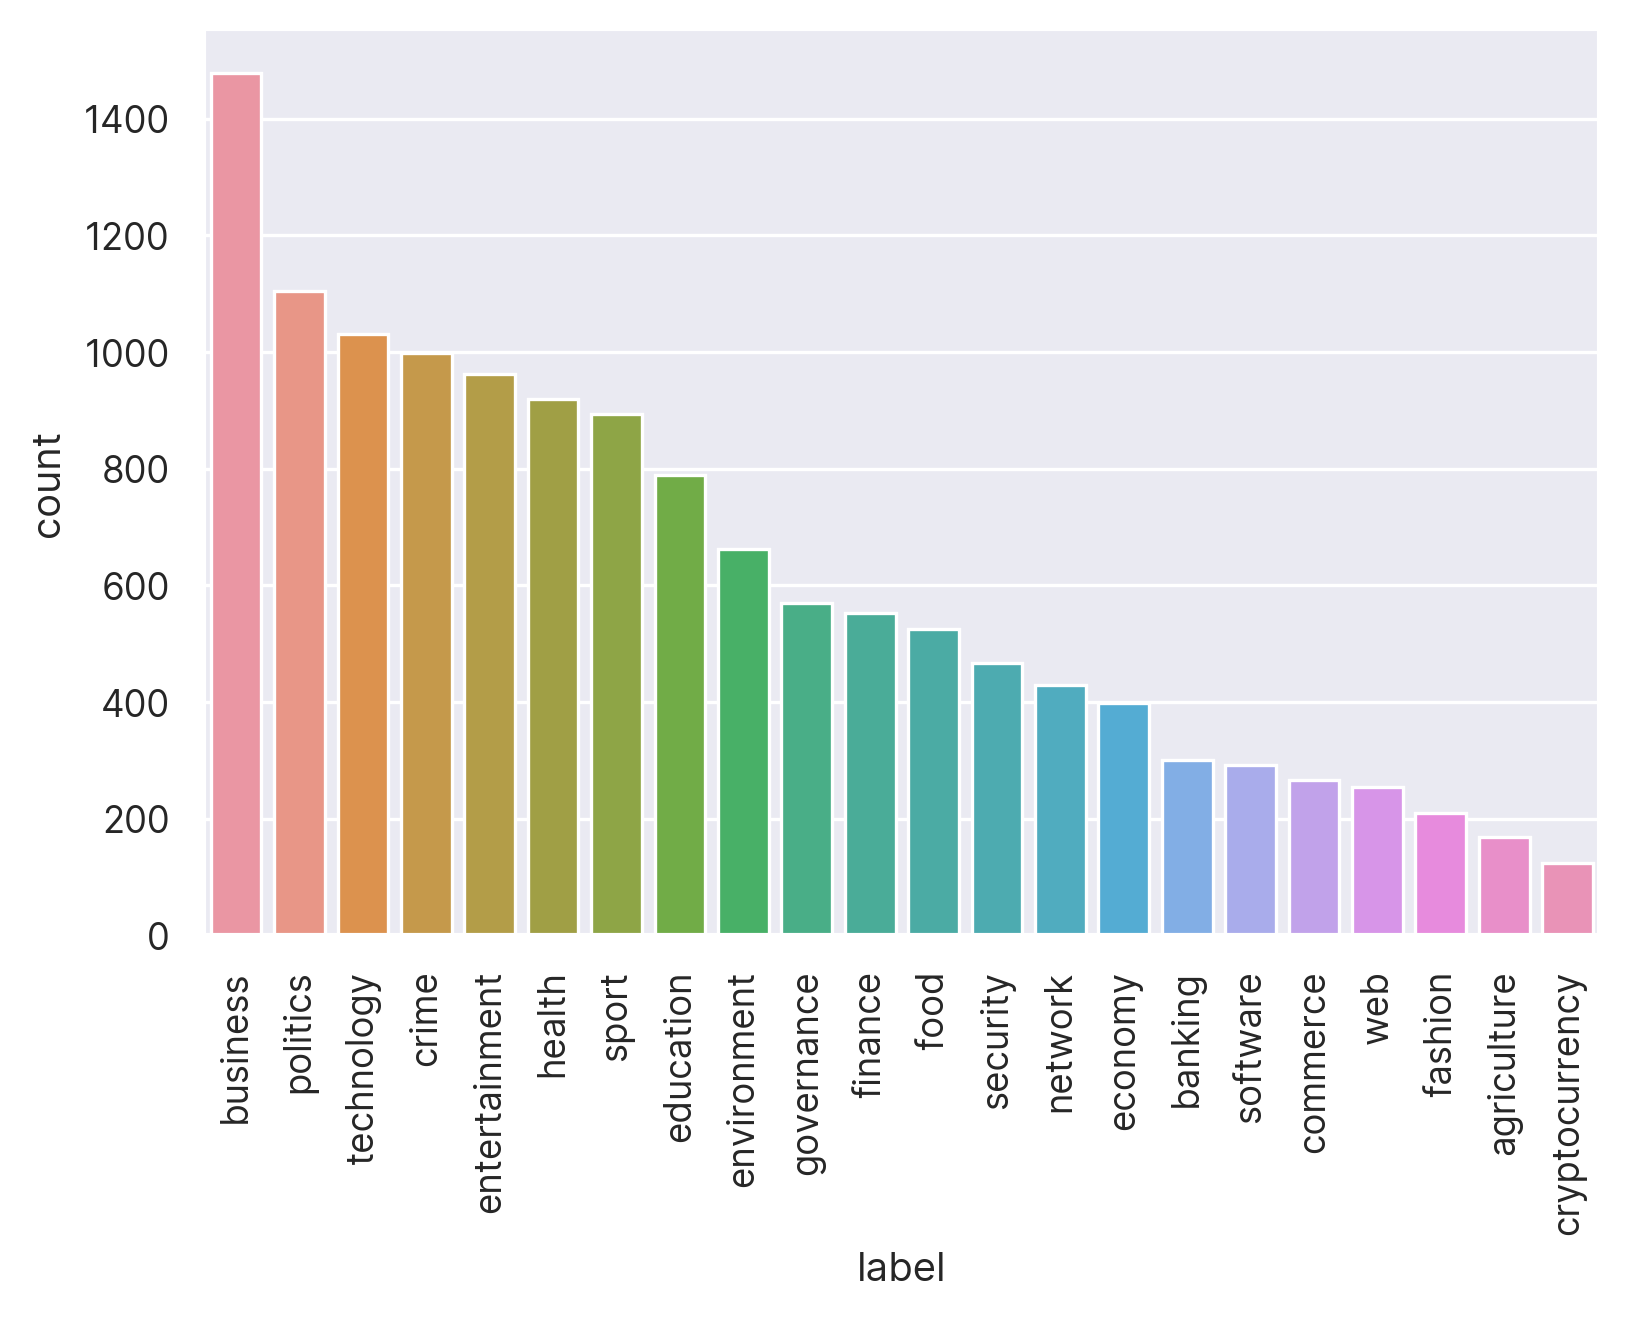

In [230]:
from collections import Counter
a=pd.DataFrame(sorted(dict(Counter(df['gl'].sum())).items(), key=lambda i: i[1], reverse=True), columns=['label', 'count'])
sns.barplot(data=a, x='label', y='count')
plt.xticks(rotation=90)
plt.show()

# Classifier

## sklearn

In [340]:
clf = DecisionTreeClassifier(class_weight='balanced')

In [341]:
# X = a['page'].apply(lambda x: word_tokenize(x))

In [342]:
# X = df['page'].apply(lambda x: word_tokenize(x)); X
X = df['extracted_labels']; X

0        [cocaine, ecstasy, crystal, drugs, gram, escro...
1        [ecstasy, cocaine, crystal, drugs, gram, escro...
2        [cart, ecstasy, cocaine, add, crystal, drugs, ...
3        [cart, add, shop, drugs, hemp, hash, marijuana...
4        [ecstasy, cocaine, crystal, drugs, gram, escro...
                               ...                        
20245    [filtering, decency, electronic, computer, con...
20246    [suitor, apple, walter, spindler, licensee, do...
20247    [volatility, stock, copyright, editorial, plus...
20248    [volatile, dow, wall, cleaning, street, indust...
20249    [output, copyright, oil, editorial, plus, weat...
Name: extracted_labels, Length: 20250, dtype: object

In [343]:
X.iloc[0]

['cocaine',
 'ecstasy',
 'crystal',
 'drugs',
 'gram',
 'escrow',
 'cart',
 'trace',
 'android',
 'pure',
 'category',
 'shop',
 'mix',
 'blue',
 'store']

In [344]:
# def embed(x):
#     output = []
#     for i in x:
#         try:
#             output.append(w2v[i])
#         except:
#             continue
#     return output

In [345]:
def embed(x):
    output = []
    for i in x:
        try:
            output.append(ft[i])
        except:
            continue
    return output

In [346]:
# X1 = X.copy()

In [347]:
X = X.apply(lambda x: np.sum(embed(x), axis=0))

In [348]:
# X = np.stack(X)

In [349]:
# data = list(zip(X, a['gl']))

In [350]:
data = list(zip(X, df['gl']))

In [351]:
data = pd.DataFrame(data, columns=['Embedding', 'Label(s)'])

In [352]:
data

Embedding  \
0      [0.026380315, -0.035603665, -0.21159308, 0.401...   
1      [0.026380315, -0.035603665, -0.21159308, 0.401...   
2      [0.1879304, 0.22346133, -0.22729509, 0.4301439...   
3      [-0.11644108, 0.2710742, -0.05202252, 0.616688...   
4      [0.026380315, -0.035603665, -0.21159308, 0.401...   
...                                                  ...   
20245  [-0.1147618, 0.18072109, 0.17081776, 0.2219668...   
20246  [-0.049643986, 0.049571604, 0.2153318, 0.14674...   
20247  [0.08647733, -0.5607699, 0.24699749, 0.1738801...   
20248  [-0.090326644, -0.122443706, 0.3026393, 0.3035...   
20249  [0.042394333, -0.5137969, 0.36018848, 0.263675...   

                            Label(s)  
0                         [business]  
1                         [business]  
2               [business, commerce]  
3               [business, commerce]  
4                         [business]  
...                              ...  
20245                     [software]  
20246                             []  
20247  [business, technology, sport]  
20248                     [business]  
20249  [business, technology, sport]  

[20250 rows x 2 columns]

In [353]:
# data.to_csv('/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/toUse(Embedding+Label(s)).csv')

In [354]:
data = data[data.apply(lambda row: len(row['Label(s)']) > 0 , axis=1)]

In [355]:
data.reset_index(inplace=True, drop=True)

In [356]:
data

Embedding  \
0     [0.026380315, -0.035603665, -0.21159308, 0.401...   
1     [0.026380315, -0.035603665, -0.21159308, 0.401...   
2     [0.1879304, 0.22346133, -0.22729509, 0.4301439...   
3     [-0.11644108, 0.2710742, -0.05202252, 0.616688...   
4     [0.026380315, -0.035603665, -0.21159308, 0.401...   
...                                                 ...   
9769  [-0.29421708, -0.43159717, 0.36338276, 0.15784...   
9770  [-0.1147618, 0.18072109, 0.17081776, 0.2219668...   
9771  [0.08647733, -0.5607699, 0.24699749, 0.1738801...   
9772  [-0.090326644, -0.122443706, 0.3026393, 0.3035...   
9773  [0.042394333, -0.5137969, 0.36018848, 0.263675...   

                           Label(s)  
0                        [business]  
1                        [business]  
2              [business, commerce]  
3              [business, commerce]  
4                        [business]  
...                             ...  
9769              [business, sport]  
9770                     [software]  
9771  [business, technology, sport]  
9772                     [business]  
9773  [business, technology, sport]  

[9774 rows x 2 columns]

In [357]:
X = np.stack(data['Embedding'])
y = data['Label(s)']

In [358]:
count_classes = len(set(y.sum()))

In [359]:
le = preprocessing.LabelEncoder()
le.fit(y.sum())
y = y.apply(le.transform)

In [360]:
mlb = MultiLabelBinarizer()

In [361]:
y = mlb.fit_transform(y)

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [418]:
# clf.fit(X_train, y_train)

In [419]:
# [le.inverse_transform(i) for i in mlb.inverse_transform(clf.predict(X_test))]

In [420]:
# print(classification_report(y_test, clf.predict(X_test), target_names=le.classes_))

## TensorFlow

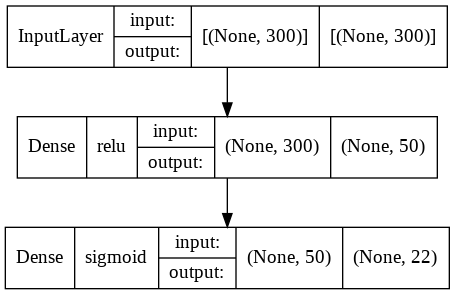

In [451]:
model = Sequential(name='classifier')
model.add(Dense(units=50, input_dim=300, activation='relu'))
# model.add(tf.keras.layers.Dropout(.10))
model.add(Dense(units=count_classes, activation='sigmoid', name='output'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

tf.keras.utils.plot_model(model, show_layer_activations=True, show_layer_names=False, show_shapes=True)

In [452]:
import itertools
a = list(itertools.chain.from_iterable(mlb.inverse_transform(y_train)))

In [453]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=list(range(0,count_classes)), y=a)

In [454]:
cw = {i: v for i, v in enumerate(class_weights)}

In [455]:
modelHist = model.fit(
    X_train, y_train, epochs=120, class_weight=cw, 
    # validation_split=.1,
    callbacks=[
            #    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
            tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4, restore_best_weights=True)
    ],
    verbose=2
)

Epoch 1/120
245/245 - 1s - loss: 0.2317 - accuracy: 0.2745 - 1s/epoch - 5ms/step
Epoch 2/120
245/245 - 1s - loss: 0.1572 - accuracy: 0.4834 - 670ms/epoch - 3ms/step
Epoch 3/120
245/245 - 1s - loss: 0.1349 - accuracy: 0.5246 - 719ms/epoch - 3ms/step
Epoch 4/120
245/245 - 1s - loss: 0.1222 - accuracy: 0.5613 - 751ms/epoch - 3ms/step
Epoch 5/120
245/245 - 1s - loss: 0.1134 - accuracy: 0.5745 - 661ms/epoch - 3ms/step
Epoch 6/120
245/245 - 1s - loss: 0.1068 - accuracy: 0.5893 - 657ms/epoch - 3ms/step
Epoch 7/120
245/245 - 1s - loss: 0.1016 - accuracy: 0.5988 - 650ms/epoch - 3ms/step
Epoch 8/120
245/245 - 1s - loss: 0.0974 - accuracy: 0.6066 - 670ms/epoch - 3ms/step
Epoch 9/120
245/245 - 1s - loss: 0.0935 - accuracy: 0.6168 - 642ms/epoch - 3ms/step
Epoch 10/120
245/245 - 1s - loss: 0.0903 - accuracy: 0.6202 - 674ms/epoch - 3ms/step
Epoch 11/120
245/245 - 1s - loss: 0.0874 - accuracy: 0.6277 - 635ms/epoch - 3ms/step
Epoch 12/120
245/245 - 1s - loss: 0.0851 - accuracy: 0.6355 - 636ms/epoch - 3

In [456]:
# plt.subplot(2,1,1)
# plt.plot(modelHist.history['accuracy'])
# plt.plot(modelHist.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')

# plt.subplot(2,1,2)
# plt.plot(modelHist.history['loss'])
# plt.plot(modelHist.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')


# plt.tight_layout(1)
# plt.savefig('model_metrics.png', bbox_inches='tight')

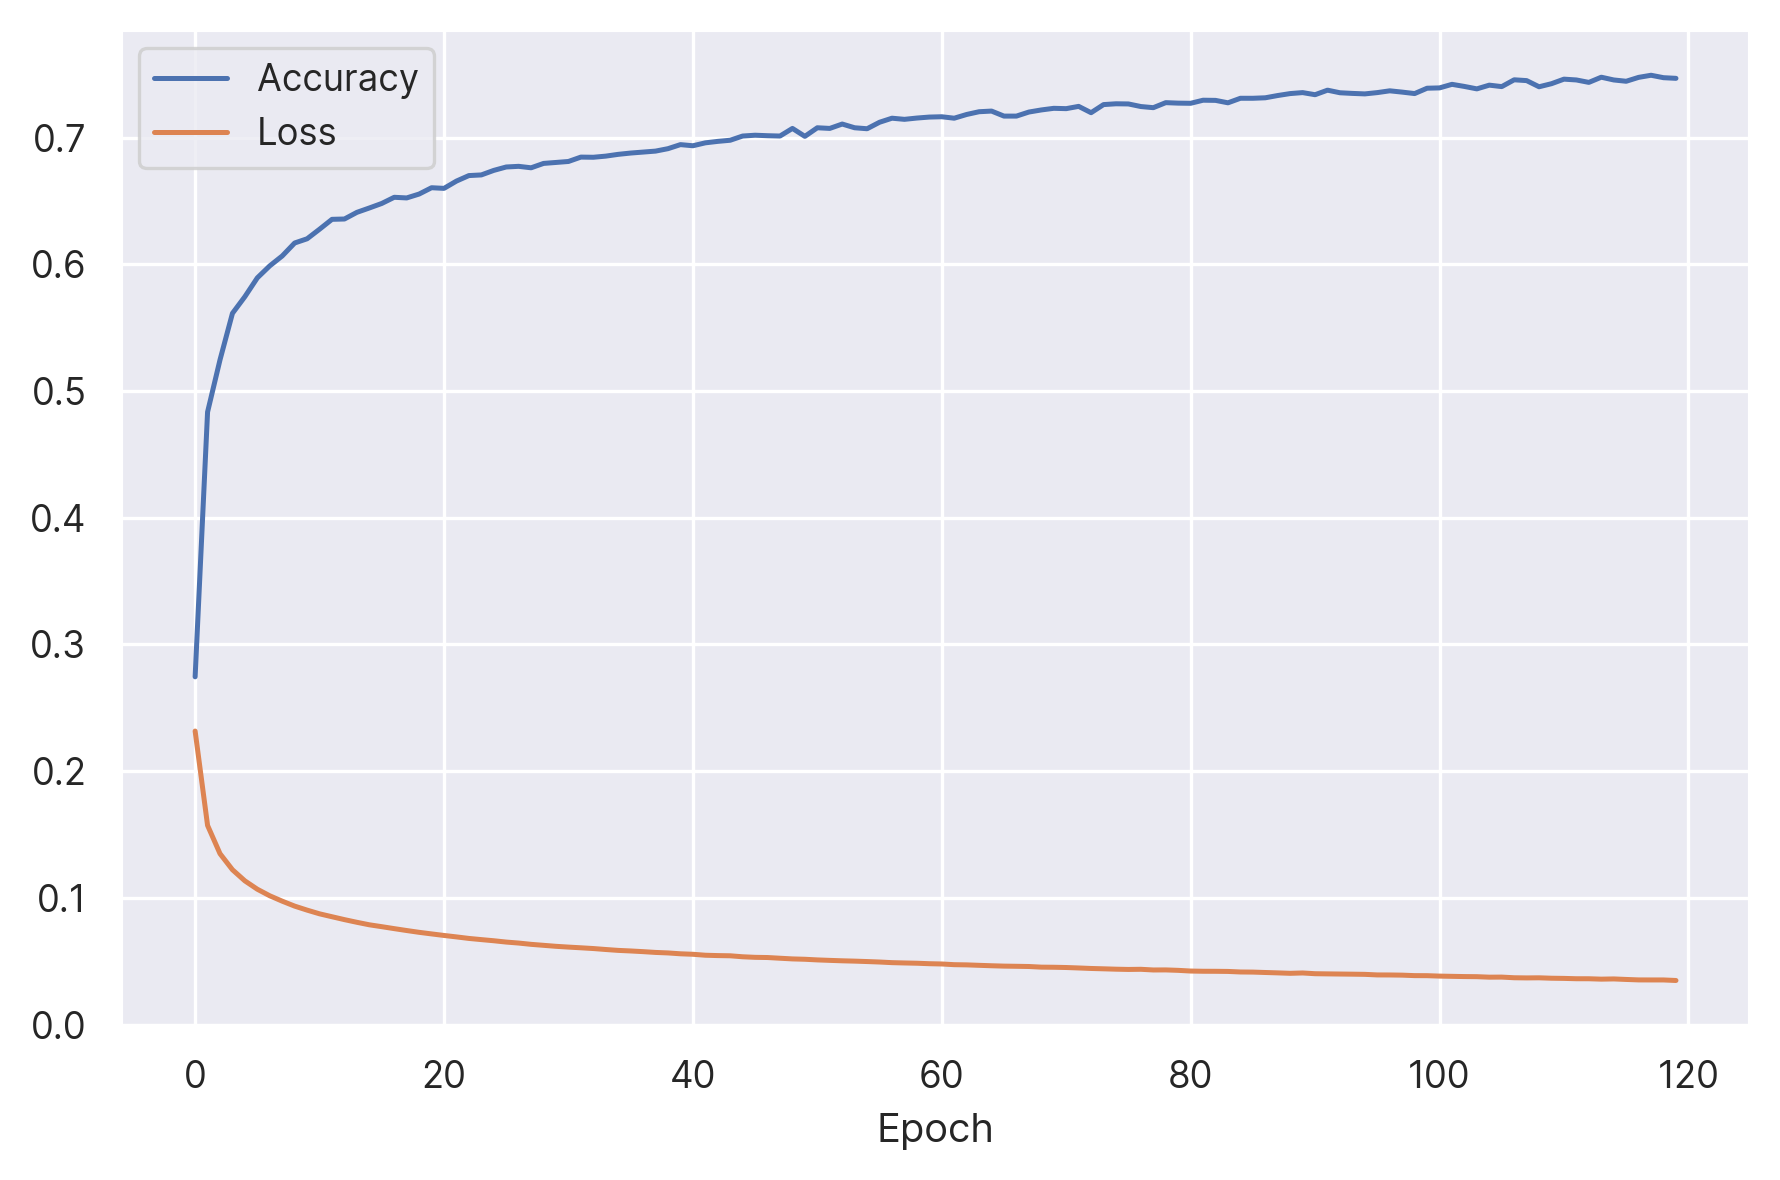

In [457]:
plt.plot(modelHist.history['accuracy'])
plt.plot(modelHist.history['loss'])
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')


plt.tight_layout(1)
plt.savefig('model_metrics.png', bbox_inches='tight')

In [458]:
print(classification_report(y_test, np.round(model.predict(X_test)), target_names=le.classes_))

                precision    recall  f1-score   support

   agriculture       0.56      0.44      0.49        41
       banking       0.82      0.82      0.82        62
      business       0.76      0.38      0.51       288
      commerce       0.62      0.75      0.68        40
         crime       0.83      0.74      0.78       210
cryptocurrency       0.91      0.64      0.75        33
       economy       0.71      0.61      0.66        93
     education       0.60      0.53      0.56       150
 entertainment       0.74      0.76      0.75       170
   environment       0.80      0.80      0.80       142
       fashion       0.81      0.62      0.70        47
       finance       0.67      0.51      0.58       120
          food       0.66      0.68      0.67       117
    governance       0.50      0.58      0.53        97
        health       0.76      0.65      0.70       189
       network       0.70      0.82      0.76        68
      politics       0.81      0.62      0.70  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
